# Energy Project Based Work

This project is to determine data analytic and coding abilities. 
It is an open ended project that should take 2-3 days of intense coding to finish

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# TASK 1

We will read in all files and combine them to one dataFrame 

In [4]:
ERCOT_2016=pd.read_csv('C:\\Users\\mpmkwsa\\Desktop\\energy-analyst-data-exercise-public-master\\historicalPriceData\\ERCOT_DA_Prices_2016.csv')
ERCOT_2017=pd.read_csv('C:\\Users\\mpmkwsa\\Desktop\\energy-analyst-data-exercise-public-master\\historicalPriceData\\ERCOT_DA_Prices_2017.csv')
ERCOT_2018=pd.read_csv('C:\\Users\\mpmkwsa\\Desktop\\energy-analyst-data-exercise-public-master\\historicalPriceData\\ERCOT_DA_Prices_2018.csv')
ERCOT_2019=pd.read_csv('C:\\Users\\mpmkwsa\\Desktop\\energy-analyst-data-exercise-public-master\\historicalPriceData\\ERCOT_DA_Prices_2019.csv')
ERCO=pd.concat([ERCOT_2016,ERCOT_2017,ERCOT_2018,ERCOT_2019])
ERCO.to_csv('ERCO.csv', index=False)
ERCO.tail()

,Date,SettlementPoint,Price
129101,2019-12-31 23:00:00,LZ_LCRA,14.53
129102,2019-12-31 23:00:00,LZ_NORTH,14.48
129103,2019-12-31 23:00:00,LZ_RAYBN,14.48
129104,2019-12-31 23:00:00,LZ_SOUTH,14.70
129105,2019-12-31 23:00:00,LZ_WEST,16.78


# TASK 2

In this step I will compute the average price for each settlemet point and near year-month in the historical dataset

Used 3 different lines of code to calculate the average price for each settlement point.

In [8]:
#First the settlement points are individually grouped to make sure they are distinct
ERCOT_AVERAGE = ERCO['SettlementPoint'].unique()
ERCOT_AVERAGE

array(['HB_BUSAVG', 'HB_HOUSTON', 'HB_HUBAVG', 'HB_NORTH', 'HB_SOUTH',
       'HB_WEST', 'LZ_AEN', 'LZ_CPS', 'LZ_HOUSTON', 'LZ_LCRA', 'LZ_NORTH',
       'LZ_RAYBN', 'LZ_SOUTH', 'LZ_WEST', 'HB_PAN'], dtype=object)

In [9]:

average_price = ERCO.groupby('SettlementPoint')['Price'].mean().reset_index()
average_price.to_csv('SettlementPointmean.csv')
pd.DataFrame(average_price)

,SettlementPoint,Price
0,HB_BUSAVG,29.420988
1,HB_HOUSTON,31.096580
2,HB_HUBAVG,29.512695
3,HB_NORTH,29.109678
4,HB_PAN,35.882074
5,HB_SOUTH,29.897728
6,HB_WEST,27.947969
7,LZ_AEN,29.624877
8,LZ_CPS,30.844485
9,LZ_HOUSTON,31.530224


In [10]:
average_priced = ERCO.groupby('SettlementPoint')['Price'].agg([np.sum, np.mean, np.std]).reset_index()

In [13]:
average_priced

,SettlementPoint,sum,mean,std
0,HB_BUSAVG,1031499.84,29.420988,90.945900
1,HB_HOUSTON,1090246.10,31.096580,91.178486
2,HB_HUBAVG,1034715.09,29.512695,90.954232
3,HB_NORTH,1020585.30,29.109678,91.006554
4,HB_PAN,232515.84,35.882074,191.254209
5,HB_SOUTH,1048214.34,29.897728,90.732483
6,HB_WEST,979855.81,27.947969,91.089477
7,LZ_AEN,1038648.20,29.624877,90.947911
8,LZ_CPS,1081407.65,30.844485,91.155379
9,LZ_HOUSTON,1105449.67,31.530224,91.354908


In [14]:
average_prices = ERCO.groupby(ERCO['SettlementPoint']).agg({'Price': 'mean'}).reset_index()

In [15]:
average_prices

,SettlementPoint,Price
0,HB_BUSAVG,29.420988
1,HB_HOUSTON,31.096580
2,HB_HUBAVG,29.512695
3,HB_NORTH,29.109678
4,HB_PAN,35.882074
5,HB_SOUTH,29.897728
6,HB_WEST,27.947969
7,LZ_AEN,29.624877
8,LZ_CPS,30.844485
9,LZ_HOUSTON,31.530224


In [7]:
# ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
#    'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
#    'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
#    'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
#    'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
# df = pd.DataFrame(ipl_data)

# grouped = df.groupby('Year')

Computing average prices for dates

In [16]:
average_prices = ERCO.groupby('Date')['Price'].mean().reset_index()
average_prices.to_csv('DateMeann.csv')
pd.DataFrame(average_prices)

,Date,Price
0,2016-01-01 00:00:00,18.412857
1,2016-01-01 01:00:00,16.140000
2,2016-01-01 02:00:00,15.600000
3,2016-01-01 03:00:00,15.607857
4,2016-01-01 04:00:00,15.930714
...,...,...
35055,2019-12-31 19:00:00,19.853333
35056,2019-12-31 20:00:00,18.463333
35057,2019-12-31 21:00:00,16.544000
35058,2019-12-31 22:00:00,15.572667


# TASK 3

The following tasks were completed with by running 3 different sets of lines of code to complete this task. 

In [18]:
ERCO['Date'] = pd.to_datetime(ERCO['Date'])
ERCO['year'] = pd.DatetimeIndex(ERCO['Date']).year
ERCO['month'] = pd.DatetimeIndex(ERCO['Date']).month
ERCO.head()

,Date,SettlementPoint,Price,year,month
0,2016-01-01,HB_BUSAVG,18.42,2016,1
1,2016-01-01,HB_HOUSTON,18.42,2016,1
2,2016-01-01,HB_HUBAVG,18.42,2016,1
3,2016-01-01,HB_NORTH,18.43,2016,1
4,2016-01-01,HB_SOUTH,18.38,2016,1


In [19]:
AveragePriceByMonth = ERCO.groupby(['SettlementPoint', 'year', 'month'])['Price'].mean().reset_index()

In [ ]:
AveragePriceByMonth

In [ ]:
AveragePriceByMonth = ERCO.groupby(['SettlementPoint', 'year', 'month'])['Price'].agg([np.mean]).reset_index()
AveragePriceByMonth.rename(columns={'Price': 'AveragePrice'}, inplace=False)
AveragePriceByMonth.head()

In [20]:
AveragePriceByMonth = ERCO.groupby(['SettlementPoint', 'year', 'month']).agg({'Price': 'mean'}).reset_index()
AveragePriceByMonth.rename(columns={'Price': 'AveragePrice'}, inplace=False)
AveragePriceByMonth.head()

,SettlementPoint,year,month,Price
0,HB_BUSAVG,2016,1,19.209301
1,HB_BUSAVG,2016,2,15.288247
2,HB_BUSAVG,2016,3,16.755626
3,HB_BUSAVG,2016,4,18.289347
4,HB_BUSAVG,2016,5,18.159583


In [ ]:
# save AveragePriceByMonth as csv file

AveragePriceByMonth.to_csv('AveragePriceByMonth.csv', index=False)

# Price Volatility

# Task 4

In [ ]:
ERCOT.head()

In [22]:
# filter out prices less than zero and load zones

filtered = ERCO[(ERCO['Price'] != 0) & (ERCO['Price'] > 0) & (ERCO['SettlementPoint'].str.contains('HB_'))]

In [ ]:
filtered.head()

In [23]:
filters = ERCO[ERCO['Price']>0]

In [24]:
filters

,Date,SettlementPoint,Price,year,month
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,2016,1
1,2016-01-01 00:00:00,HB_HOUSTON,18.42,2016,1
2,2016-01-01 00:00:00,HB_HUBAVG,18.42,2016,1
3,2016-01-01 00:00:00,HB_NORTH,18.43,2016,1
4,2016-01-01 00:00:00,HB_SOUTH,18.38,2016,1
...,...,...,...,...,...
129101,2019-12-31 23:00:00,LZ_LCRA,14.53,2019,12
129102,2019-12-31 23:00:00,LZ_NORTH,14.48,2019,12
129103,2019-12-31 23:00:00,LZ_RAYBN,14.48,2019,12
129104,2019-12-31 23:00:00,LZ_SOUTH,14.70,2019,12


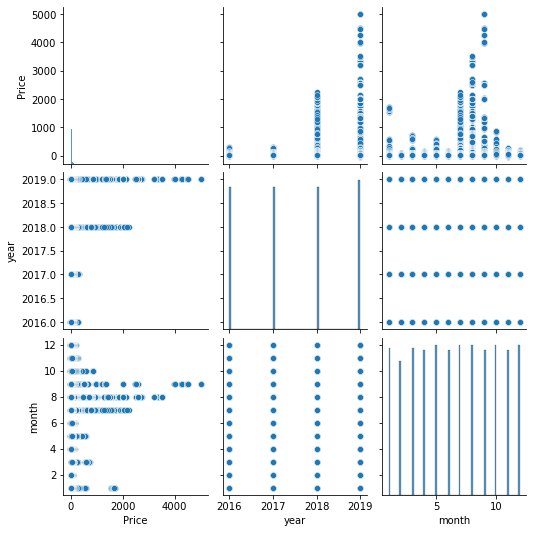

In [25]:
sns.pairplot(ERCO)